In [1]:
# Importing Libraries 
import pandas as pd
import ast
from datasets import load_dataset 
import matplotlib.pyplot as plt
# Loading Data
dataset = load_dataset ( 'lukebarousse/data_jobs')
df = dataset ['train'].to_pandas ()
# Data Cleanup
df['job_posted_date'] = pd.to_datetime (df ['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)
df_da_us = df[(df['job_title_short'] == "Data Analyst") & (df['job_country']== 'United States')].copy()
df_da_us=df_da_us.dropna(subset=['salary_year_avg'])

In [38]:
df_da_us['salary_year_avg'].sample(10)

199233     59192.500
411044    111500.000
20635     115000.000
206730     92500.000
292377    135000.000
228950    108709.000
737324     85395.875
472026     73600.000
415127     57500.000
759309     85000.000
Name: salary_year_avg, dtype: float64

<Axes: >

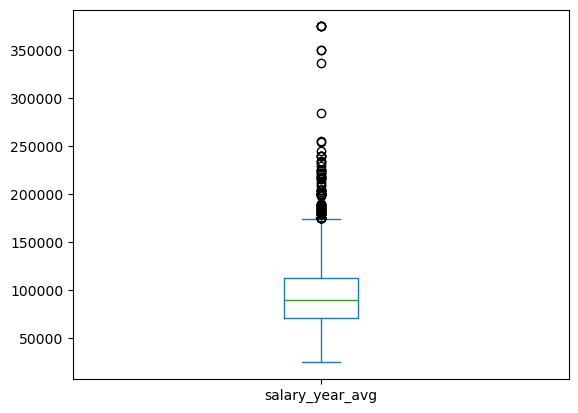

In [40]:
df_da_us['salary_year_avg'].plot(kind='box')

C:\Users\myloc\AppData\Local\Temp\ipykernel_13564\1575683937.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert = False)


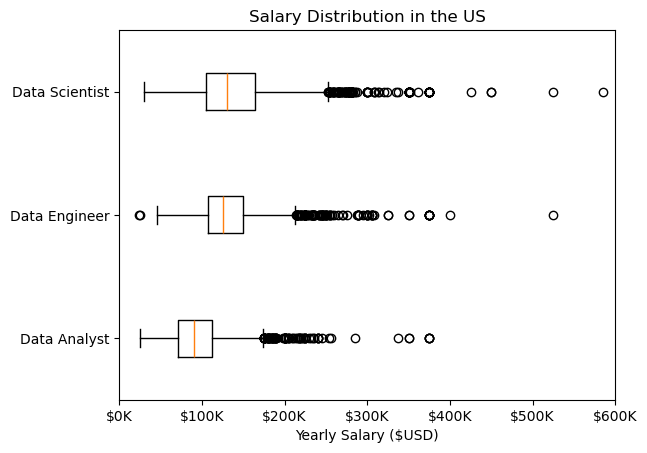

In [58]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_us = df[(df['job_title_short'].isin(job_titles)) & (df['job_country']== 'United States')].copy()
df_us = df_us.dropna(subset='salary_year_avg')
job_list = [df_us[df_us['job_title_short']==job_title]['salary_year_avg'] for job_title in job_titles]
plt.boxplot(job_list, labels=job_titles, vert = False)
plt.title('Salary Distribution in the US')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()

In [50]:
job_list[1]

92        120000.0
146       129500.0
307       185000.0
339       195000.0
380        97500.0
            ...   
783111    125000.0
784102     90000.0
784191    217500.0
785624    139216.0
785641    150000.0
Name: salary_year_avg, Length: 2915, dtype: float64

In [46]:
df_us

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"[sql, python]","{'programming': ['sql', 'python']}"
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"[sql, r, python, express]","{'programming': ['sql', 'r', 'python'], 'webfr..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
116,Data Scientist,Data Scientist,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-10-04 13:04:23,False,False,United States,year,114000.0,NaN,4 Corner Resources,"[r, python, sql, t-sql, hadoop, spark, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
146,Data Engineer,Data Engineer Graduate (Real Time Communicatio...,"Seattle, WA",via LinkedIn,Full-time,False,"California, United States",2023-10-21 13:06:16,False,True,United States,year,129500.0,NaN,ByteDance,"[golang, scala, python, java, hadoop, spark]","{'libraries': ['hadoop', 'spark'], 'programmin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785563,Data Scientist,Data Scientist I/II (Model Risk Management & M...,"Pensacola, FL",via Navy Federal Credit Union - Talentify,Full-time,False,"Florida, United States",2023-01-11 06:22:10,False,False,United States,year,136400.0,NaN,Navy Federal Credit Union,"[r, python, matplotlib, ggplot2, spark, word, ...","{'analyst_tools': ['word', 'power bi', 'tablea..."
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"[go, python, r, sql, oracle, windows, alteryx,...","{'analyst_tools': ['alteryx', 'power bi', 'tab..."
785641,Data Engineer,Data Engineer,"New York, NY",via Dice,Full-time,False,Georgia,2023-01-04 16:36:07,True,False,United States,year,150000.0,NaN,"Engage Partners, Inc.",None,None
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"[python, azure, snowflake, spark]","{'cloud': ['azure', 'snowflake'], 'libraries':..."


In [45]:
df_us['salary_year_avg']

92        120000.0
100       228222.0
109        89000.0
116       114000.0
146       129500.0
            ...   
785563    136400.0
785624    139216.0
785641    150000.0
785648    221875.0
785692    157500.0
Name: salary_year_avg, Length: 11818, dtype: float64